# Future Years

PyPSA-GB can model the GB power system  by solving a network constrained Linear Optimal Power Flow (LOPF) problem. This notebook shows the example application of a FES 2022.

In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.style.use('ggplot')
import pandas as pd
import cartopy.crs as ccrs
import data_reader_writer

## Setting up simulation

Set the required inputs for the LOPF: the start, end and year of simulation, and the timestep.

The HVDC links used as an interconnector for import and export between GB and nearby regions such as Norway, N.Ireland, France are disregarded in this optimal economic dispatch analysis.

In [3]:
df_network=pd.read_csv('LOPF_data_heat_2022/buses.csv')
cols=df_network.name.values[29:].tolist()
cols=['Timestamp']+cols
cols

['Timestamp',
 'Beauly',
 'Peterhead',
 'Errochty',
 'Denny/Bonnybridge',
 'Neilston',
 'Strathaven',
 'Torness',
 'Eccles',
 'Harker',
 'Stella West',
 'Penwortham',
 'Deeside',
 'Daines',
 'Th. Marsh/Stocksbridge',
 'Thornton/Drax/Eggborough',
 'Keadby',
 'Ratcliffe',
 'Feckenham',
 'Walpole',
 'Bramford',
 'Pelham',
 'Sundon/East Claydon',
 'Melksham',
 'Bramley',
 'London',
 'Kemsley',
 'Sellindge',
 'Lovedean',
 'S.W.Penisula']

In [4]:
heating_EDRP=pd.read_csv('REMA/domestic_EDRP/2035/scaled with normalised profiles/hourly heat demand total_withGasboilers_MW.csv')
heating_EDRP_DHN=pd.read_csv('REMA/domestic_EDRP_DHN/2035/scaled with normalised profiles/hourly heat demand total_withDHN_MW.csv')
heating_RHPP=pd.read_csv('REMA/domestic_RHPP/2035/scaled with normalised profiles/hourly heat demand total_withHPs_MW_2035.csv')

In [5]:
heating_EDRP.columns=cols
heating_EDRP_DHN.columns=cols
heating_RHPP.columns=cols
heating_RHPP

,Timestamp,Beauly,Peterhead,Errochty,Denny/Bonnybridge,Neilston,Strathaven,Torness,Eccles,Harker,...,Bramford,Pelham,Sundon/East Claydon,Melksham,Bramley,London,Kemsley,Sellindge,Lovedean,S.W.Penisula
0,01/01/2035 00:00,298.633935,1119.197072,426.459291,3759.804199,637.566817,7069.859609,1333.016837,422.734298,758.505593,...,2334.039885,1209.817471,3462.652978,4109.550930,3093.793550,16771.97161,4276.982972,919.814928,4268.659025,2021.809521
1,01/01/2035 01:00,298.633935,1199.775306,426.459291,3759.804199,637.566817,7069.859609,1627.018489,515.969866,858.372994,...,2641.347436,1209.817471,3918.557530,4650.628245,3501.132828,18980.22588,4276.982972,1040.920859,4830.685047,2166.527830
2,01/01/2035 02:00,298.633935,1339.674940,558.987389,4928.215127,637.566817,7069.859609,1884.515263,597.628788,758.505593,...,3059.374920,1209.817471,3462.652978,5386.650471,4055.232499,21984.09275,5606.114327,1205.660083,4830.685047,2166.527830
3,01/01/2035 03:00,377.741149,1499.760328,629.617617,5550.914253,941.293362,10437.826650,2122.631087,673.141507,1119.845419,...,3445.938825,1209.817471,5112.204985,5386.650471,3501.132828,24761.86827,6314.468649,1357.999918,6302.179307,2826.482523
4,01/01/2035 04:00,448.393814,1647.363505,629.617617,5550.914253,941.293362,10437.826650,2290.484834,726.372295,1208.400727,...,3718.437305,1209.817471,5516.468716,6547.063562,4928.826377,26719.99109,6813.805171,1357.999918,6800.544010,3049.995542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31/12/2035 19:00,1019.946220,2991.733982,1469.744749,12957.749050,2495.233954,27669.184260,4302.362121,1364.390892,4036.517191,...,4912.858439,2221.948571,3462.652978,11914.903720,4055.232499,25887.74596,6030.280340,1099.088119,7839.811414,6474.806315
8756,31/12/2035 20:00,1019.946220,3811.576625,1869.419432,16481.411410,2479.989466,27500.140980,3932.898036,1247.224225,4200.925044,...,3445.938825,2221.948571,6415.397158,11914.903720,3501.132828,25887.74596,4276.982972,1390.174840,7839.811414,3887.684106
8757,31/12/2035 21:00,1019.946220,3168.929717,1869.419432,16481.411410,2495.233954,27669.184260,4302.362121,1364.390892,2809.572130,...,2762.581779,1209.817471,6415.397158,10874.194390,3995.894843,28937.83567,5977.093782,1399.090551,9084.531885,5202.673779
8758,31/12/2035 22:00,1019.946220,4917.555056,1869.419432,16481.411410,2444.030708,27101.401010,6203.037599,1967.144505,3710.528674,...,2762.581779,2221.948571,5306.832978,18725.970720,7626.789341,21662.41341,5524.083597,1035.772758,6800.544010,6929.134075


In [6]:
total_heating_demand=heating_EDRP_DHN+heating_RHPP+heating_EDRP

In [7]:
total_heating_demand['Timestamp']=heating_EDRP['Timestamp']           # overriding the timestamp since that altered during addition


In [8]:
total_heating_demand = total_heating_demand.reset_index(drop=True)
total_heating_demand.set_index('Timestamp')

,Beauly,Peterhead,Errochty,Denny/Bonnybridge,Neilston,Strathaven,Torness,Eccles,Harker,Stella West,...,Bramford,Pelham,Sundon/East Claydon,Melksham,Bramley,London,Kemsley,Sellindge,Lovedean,S.W.Penisula
Timestamp,,,,,,,,,,,,,,,,,,,,,
01/01/2035 00:00,584.528117,1405.070103,569.740534,4166.093011,2728.123559,7084.370186,2286.678042,707.291720,1116.191417,6318.484922,...,4024.920574,2652.149439,5186.952463,7383.994634,5064.436497,24615.410345,5649.234434,1287.862005,6367.521021,3322.315844
01/01/2035 01:00,584.528117,1449.529413,569.740534,4166.093011,2728.123559,7084.370186,2529.597272,785.285101,1169.233198,6406.501872,...,4110.870358,2652.149439,5417.124301,7496.405659,5213.793572,25796.858817,5649.234434,1360.785897,6654.779338,3131.299263
01/01/2035 02:00,584.528117,1591.707603,683.840543,5282.249186,2728.123559,7084.370186,2789.480508,867.656106,1116.191417,8072.829040,...,4532.783331,2652.149439,5186.952463,8239.952259,5772.421601,28818.749196,6801.873944,1526.370860,6654.779338,3131.299263
01/01/2035 03:00,677.378638,1804.568793,778.831557,5974.025845,3118.411621,10452.938051,3204.169081,995.855340,1492.341569,9213.561969,...,5206.832060,2652.149439,6907.900753,8239.952259,5213.793572,32930.072149,7743.539505,1741.286339,8487.946708,3982.544442
01/01/2035 04:00,978.134735,2191.168561,778.831557,5974.025845,3118.411621,10452.938051,4221.818634,1302.651757,1873.577918,6406.501872,...,6862.915483,2652.149439,8723.094788,12636.444578,8593.569715,41306.189919,9365.738494,1741.286339,10703.732322,5114.408878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/2035 19:00,5025.887002,4055.841957,3276.291586,18080.399835,36999.936267,27908.681767,10990.761653,3360.103536,11072.693647,34577.113117,...,19316.096802,8937.990604,5186.952463,35889.587232,5772.421601,88450.567736,16521.216760,2225.551154,17612.905059,20627.832457
31/12/2035 20:00,5025.887002,5970.305106,4672.839915,24430.800734,38810.094635,27752.308627,13823.830109,4198.521933,13143.089561,47745.159692,...,5206.832060,8937.990604,16037.459171,35889.587232,5213.793572,88450.567736,5649.234434,4294.980722,17612.905059,9489.596348
31/12/2035 21:00,5025.887002,3924.792892,4672.839915,24430.800734,36999.936267,27908.681767,10990.761653,3360.103536,6934.656740,46481.036914,...,7754.844069,2652.149439,16037.459171,29507.232614,10007.849009,62155.656823,12578.460269,4437.371711,12224.182174,8705.015130


In [9]:
total_heating_demand.to_csv('LOPF_data_heat_2035/total_heating_demand.csv',index=False,header=True)

In [10]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data_heat_2035')

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
INFO:pypsa.io:Imported network LOPF_data_heat_2035 has buses, generators, lines, links, loads, storage_units


A boiler at each heat nodes is integrated and added as a generator compoenent which is used as a back up heating source to the storage and the heat pump units to meet the hour by hour heat demand for the yearly operating period. The nominal capcity of the boiler is allwed to be extendable so that the optimisation algorithm will dispatch the needed optimal back up boiler capcity.

In [11]:
for i in range(29):
    network.add(
        "Generator",
        "boiler {}".format(i+1),
       bus='Heat Bus {}'.format(i+1),
       p_nom_extendable=True,
        ramp_limit_up=1,
        ramp_limit_down=1,
        efficiency=0.80,
        marginal_cost=20.0,
        carrier="heat",
    )

Links need to be scaled up to accomadate for future generation.

In [12]:
contingency_factor = 0.7
network.lines.s_max_pu *= contingency_factor

In [13]:
network.generators

,carrier,type,p_nom,bus,marginal_cost,ramp_limit_up,ramp_limit_down,p_max_pu,control,p_nom_extendable,...,committable,start_up_cost,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
West Burton,Coal,Conventional steam,0.000000,Keadby,NaN,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Sutton Bridge CCS Gas,CCS Gas,CCS Gas,91.729774,Walpole,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Baglan Bay CCS Gas,CCS Gas,CCS Gas,58.241127,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Severn Power CCS Gas,CCS Gas,CCS Gas,95.201840,Melksham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
Blackburn CCS Gas,CCS Gas,CCS Gas,6.720130,Penwortham,100.0,1.0,1.0,1.0,PQ,False,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boiler 25,heat,,0.000000,Heat Bus 25,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 26,heat,,0.000000,Heat Bus 26,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0
boiler 27,heat,,0.000000,Heat Bus 27,20.0,1.0,1.0,1.0,PQ,True,...,False,0.0,0.0,0,0,1,0,1.0,1.0,0.0


In [14]:
network.consistency_check()

In [15]:
network.generators_t.p_max_pu

Generator,Wind Offshore Keadby,Wind Offshore Peterhead,Wind Offshore Deeside,Wind Offshore Bramford,Wind Offshore Walpole,Wind Offshore Kemsley,Wind Offshore Harker,Wind Offshore Sellindge,Wind Offshore Penwortham,Wind Offshore Stella West,...,Tidal lagoon Melksham,Tidal lagoon S.W.Penisula,Tidal stream Peterhead,Tidal stream Deeside,Tidal stream Lovedean,Tidal stream Beauly,Tidal stream Neilston,Tidal stream S.W.Penisula,Wave power Beauly,Wave power Melksham
snapshot,,,,,,,,,,,,,,,,,,,,,
2035-01-01 00:00:00,1.000000,0.910708,0.986240,0.991297,0.999900,0.996920,0.998234,1.000000,0.999829,0.999298,...,0.000000,0.000000,1.000000,0.452781,0.528102,0.114070,1.000000,0.702903,0.34667,0.216000
2035-01-01 01:00:00,1.000000,0.907309,0.999388,0.994648,1.000000,0.997603,1.000000,1.000000,1.000000,0.999596,...,0.000000,0.000000,1.000000,0.270388,0.452781,0.912560,0.803177,0.324320,0.34667,0.216000
2035-01-01 02:00:00,1.000000,0.921438,0.999997,0.999023,1.000000,0.996054,1.000000,1.000000,1.000000,0.999957,...,0.222722,0.000000,1.000000,0.066013,0.222793,0.803177,0.270388,0.114070,0.45200,0.216000
2035-01-01 03:00:00,1.000000,0.968762,1.000000,0.998862,1.000000,0.988015,1.000000,1.000000,1.000000,0.999997,...,0.494556,0.678111,0.384986,0.000000,0.000000,0.270388,0.000000,0.000000,0.45200,0.260000
2035-01-01 04:00:00,1.000000,0.964853,0.999939,0.996726,1.000000,0.977303,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.081278,0.000000,0.066013,0.000000,0.000000,0.000000,0.066013,0.45200,0.254670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035-12-31 19:00:00,0.997458,0.985476,0.957472,0.999723,0.997646,1.000000,0.906656,1.000000,0.991397,0.980713,...,0.018167,0.000000,0.000000,0.324320,0.324320,0.087863,0.912560,0.611344,0.25067,0.136000
2035-12-31 20:00:00,0.859724,0.988627,0.971011,0.997984,0.877197,0.987612,0.986299,1.000000,0.999465,0.962762,...,0.000000,0.000000,0.803177,0.611344,0.912560,0.000000,1.000000,1.000000,0.25067,0.104670
2035-12-31 21:00:00,0.621725,0.987229,0.989499,0.983406,0.626542,0.897459,0.993227,1.000000,0.999965,0.974996,...,0.000000,0.000000,1.000000,0.528102,0.803177,0.803177,1.000000,0.803177,0.34667,0.104670


In [16]:
#network.model
Linopy_model=network.optimize.create_model()

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


In [17]:

#network.model.constraints.remove("Kirchhoff-Voltage-Law")    Removing the Kirchoff's Voltage Law constraints which converts to a transport model

#def remove_kvl(network, sns):
   # print("KVL removed!")
    #network.model.constraints.remove("Kirchhoff-Voltage-Law")

#network.optimize(solver_name='gurobi',extra_functionality=remove_kvl)
network.optimize(solver_name='gurobi')

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
INFO:linopy.model: Solve linear problem using Gu

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-29


Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-m6h2x0r1.lp
Reading time = 50.72 seconds
obj: 28661856 rows, 9075419 columns, 51603167 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 28661856 rows, 9075419 columns and 51603167 nonzeros
Model fingerprint: 0x259b48d3
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+09]
  Bounds range     [1e+07, 1e+07]
  RHS range        [8e-07, 2e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 25359348 rows and 702137 columns (presolve time = 7s) ...
Presolve removed 25359348 rows and 702137 columns (presolve time = 10s) ...
Presolve removed 25366974 rows and 2270000 columns (presolve time 

  86   4.27150043e+14  4.27142172e+14  2.78e-06 6.20e+01  6.29e+02  1021s
  87   4.27149985e+14  4.27142299e+14  2.28e-06 5.97e+01  6.14e+02  1032s
  88   4.27149886e+14  4.27142762e+14  2.31e-06 6.28e+01  5.69e+02  1045s
  89   4.27149713e+14  4.27142959e+14  2.46e-06 5.43e+01  5.40e+02  1057s
  90   4.27149601e+14  4.27143211e+14  2.58e-06 3.23e+01  5.11e+02  1069s
  91   4.27149540e+14  4.27143329e+14  2.01e-06 3.22e+01  4.96e+02  1082s
  92   4.27149423e+14  4.27143747e+14  1.24e-06 3.07e+01  4.54e+02  1095s
  93   4.27149367e+14  4.27143788e+14  1.18e-06 3.05e+01  4.46e+02  1107s
  94   4.27149295e+14  4.27143887e+14  9.93e-07 3.06e+01  4.32e+02  1122s
  95   4.27149265e+14  4.27144070e+14  9.83e-07 3.20e+01  4.15e+02  1135s
  96   4.27149194e+14  4.27144234e+14  1.02e-06 2.73e+01  3.97e+02  1148s
  97   4.27149167e+14  4.27144402e+14  9.96e-07 2.36e+01  3.81e+02  1158s
  98   4.27149083e+14  4.27144577e+14  1.02e-06 2.35e+01  3.60e+02  1172s
  99   4.27149009e+14  4.27144784e+14 

 197   4.27147657e+14  4.27147630e+14  1.02e-05 2.19e+03  2.41e+00  2489s
 198   4.27147656e+14  4.27147630e+14  1.02e-05 1.88e+03  2.25e+00  2503s
 199   4.27147655e+14  4.27147631e+14  1.02e-05 1.85e+03  2.16e+00  2516s
 200   4.27147654e+14  4.27147631e+14  1.06e-05 1.76e+03  2.01e+00  2532s
 201   4.27147653e+14  4.27147632e+14  1.10e-05 1.65e+03  1.92e+00  2545s
 202   4.27147653e+14  4.27147632e+14  1.09e-05 1.58e+03  1.82e+00  2559s
 203   4.27147652e+14  4.27147632e+14  1.06e-05 1.50e+03  1.74e+00  2573s
 204   4.27147652e+14  4.27147633e+14  9.34e-06 1.44e+03  1.64e+00  2587s
 205   4.27147651e+14  4.27147633e+14  9.61e-06 1.36e+03  1.53e+00  2603s
 206   4.27147650e+14  4.27147634e+14  9.82e-06 1.29e+03  1.42e+00  2616s
 207   4.27147649e+14  4.27147634e+14  9.60e-06 1.20e+03  1.34e+00  2630s
 208   4.27147649e+14  4.27147634e+14  9.13e-06 1.10e+03  1.26e+00  2645s
 209   4.27147648e+14  4.27147635e+14  8.06e-06 1.05e+03  1.17e+00  2658s
 210   4.27147648e+14  4.27147636e+14 

 1572029 PPushes remaining with PInf 4.1900782e+02              3985s
 1567671 PPushes remaining with PInf 4.1891054e+02              3991s
 1561386 PPushes remaining with PInf 4.1888777e+02              3996s
 1556559 PPushes remaining with PInf 4.1886127e+02              4001s
 1551270 PPushes remaining with PInf 4.1885909e+02              4006s
 1546909 PPushes remaining with PInf 4.1883353e+02              4010s
 1542463 PPushes remaining with PInf 4.1882955e+02              4015s
 1532177 PPushes remaining with PInf 4.1864516e+02              4020s
 1527185 PPushes remaining with PInf 4.1844627e+02              4025s
 1522663 PPushes remaining with PInf 3.9689768e+02              4030s
 1513717 PPushes remaining with PInf 3.9678218e+02              4039s
 1509939 PPushes remaining with PInf 3.9673179e+02              4044s
 1507235 PPushes remaining with PInf 3.9665731e+02              4050s
 1503527 PPushes remaining with PInf 3.6324509e+02              4058s
 1498583 PPushes rem

  409677 PPushes remaining with PInf 3.5955999e+02              6894s
  403232 PPushes remaining with PInf 3.5948591e+02              6914s
  397108 PPushes remaining with PInf 3.5945995e+02              6930s
  391115 PPushes remaining with PInf 3.5942140e+02              6949s
  385527 PPushes remaining with PInf 3.5939891e+02              6967s
  380060 PPushes remaining with PInf 3.5939627e+02              6981s
  374660 PPushes remaining with PInf 3.5939383e+02              6999s
  369450 PPushes remaining with PInf 3.5939031e+02              7014s
  363177 PPushes remaining with PInf 3.5939014e+02              7031s
  357431 PPushes remaining with PInf 3.5938857e+02              7048s
  351091 PPushes remaining with PInf 3.5938343e+02              7065s
  344970 PPushes remaining with PInf 3.5936956e+02              7080s
  339028 PPushes remaining with PInf 3.5935325e+02              7092s
  333269 PPushes remaining with PInf 3.5932134e+02              7104s
  327790 PPushes rem

 4396995    4.2714764e+14   0.000000e+00   9.000192e+05   7948s
 4397791    4.2714764e+14   0.000000e+00   7.527313e+05   7958s
 4398587    4.2714764e+14   0.000000e+00   6.674904e+05   7966s
 4399385    4.2714764e+14   0.000000e+00   5.783135e+05   7975s
 4400180    4.2714764e+14   0.000000e+00   5.160928e+05   7984s
 4400978    4.2714764e+14   0.000000e+00   4.606774e+05   7994s
 4401773    4.2714764e+14   0.000000e+00   4.200949e+05   8003s
 4402568    4.2714764e+14   0.000000e+00   1.690653e+05   8012s
 4403366    4.2714764e+14   0.000000e+00   1.462934e+05   8020s
 4404165    4.2714764e+14   0.000000e+00   1.525346e+05   8030s
 4404961    4.2714764e+14   0.000000e+00   1.054660e+05   8037s
 4405862    4.2714764e+14   0.000000e+00   1.843399e+05   8045s
 4406657    4.2714764e+14   0.000000e+00   7.237996e+04   8056s
 4407638    4.2714764e+14   0.000000e+00   6.163385e+04   8064s
 4408434    4.2714764e+14   0.000000e+00   5.516355e+04   8071s
 4409229    4.2714764e+14   0.000000e+00

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9075419 primals, 28661856 duals
Objective: 4.27e+14
Solver model: available
Solver message: 2



('ok', 'optimal')

In [18]:
#network.optimize.solve_model()

## Running the optimisation

In [19]:
#network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)
#network.optimize(solver_name='gurobi')  # 

In [20]:
network.generators.p_nom_opt.div(1e3) # GW  optimised capacity of generators in GW
network.storage_units.p_nom_opt.div(1e3)  # GW 
#My_network.links_t.efficiency 
network.storage_units

,p_nom,carrier,marginal_cost,max_hours,efficiency_store,efficiency_dispatch,state_of_charge_initial,bus,standing_loss,capital_cost,...,q_set,sign,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
Dinorwig,1741.158621,Pumped Storage Hydroelectric,0.0,15.275954,0.865,0.865,2.659786e+04,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1741.158621
Ffestiniog,362.741379,Pumped Storage Hydroelectric,0.0,11.281463,0.850,0.850,4.092254e+03,Deeside,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,362.741379
Cruachan,1959.783784,Pumped Storage Hydroelectric,0.0,46.808355,0.865,0.865,9.173425e+04,Errochty,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1959.783784
Foyers,1336.216216,Pumped Storage Hydroelectric,0.0,60.918161,0.865,0.865,8.139983e+04,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,1336.216216
Beauly Battery,429.391609,Battery,0.0,1.741426,0.950,0.950,7.477536e+02,Beauly,0.0,0.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,429.391609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STES_London,504.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 25,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Kemsley,505.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 26,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318
STES_Sellindge,506.000000,Seasonal Thermal Energy Storage,0.0,2880.000000,0.900,0.950,1.440000e+06,Heat Bus 27,0.1,1000.0,...,0.0,1.0,0,inf,False,NaN,False,True,0.0,499.817318


In [21]:
network.storage_units.index[120:150]
#network.storage_units.p_nom_opt[4:33].div(1e3).values

Index(['STES_Beauly', 'STES_Peterhead', 'STES_Errochty',
       'STES_Denny/BonnyBdige', 'STES_Neilston', 'STES_Strathaven',
       'STES_Torness', 'STES_Eccles', 'STES_Harker', 'STES_Stella West',
       'STES_Penwortham', 'STES_Deeside', 'STES_Daines',
       'STES_Marsh_Stocksbridge', 'STES_Thornton_Drax_Eggborough',
       'STES_Keadby', 'STES_Ratcliffe', 'STES_Feckenham', 'STES_Walpole',
       'STES_Bramford', 'STES_Pelham', 'STES_Sundon_East_Claydon',
       'STES_Melksham', 'STES_Bramley', 'STES_London', 'STES_Kemsley',
       'STES_Sellindge', 'STES_Lovedean', 'STES_S_W_Penisula'],
      dtype='object', name='StorageUnit')

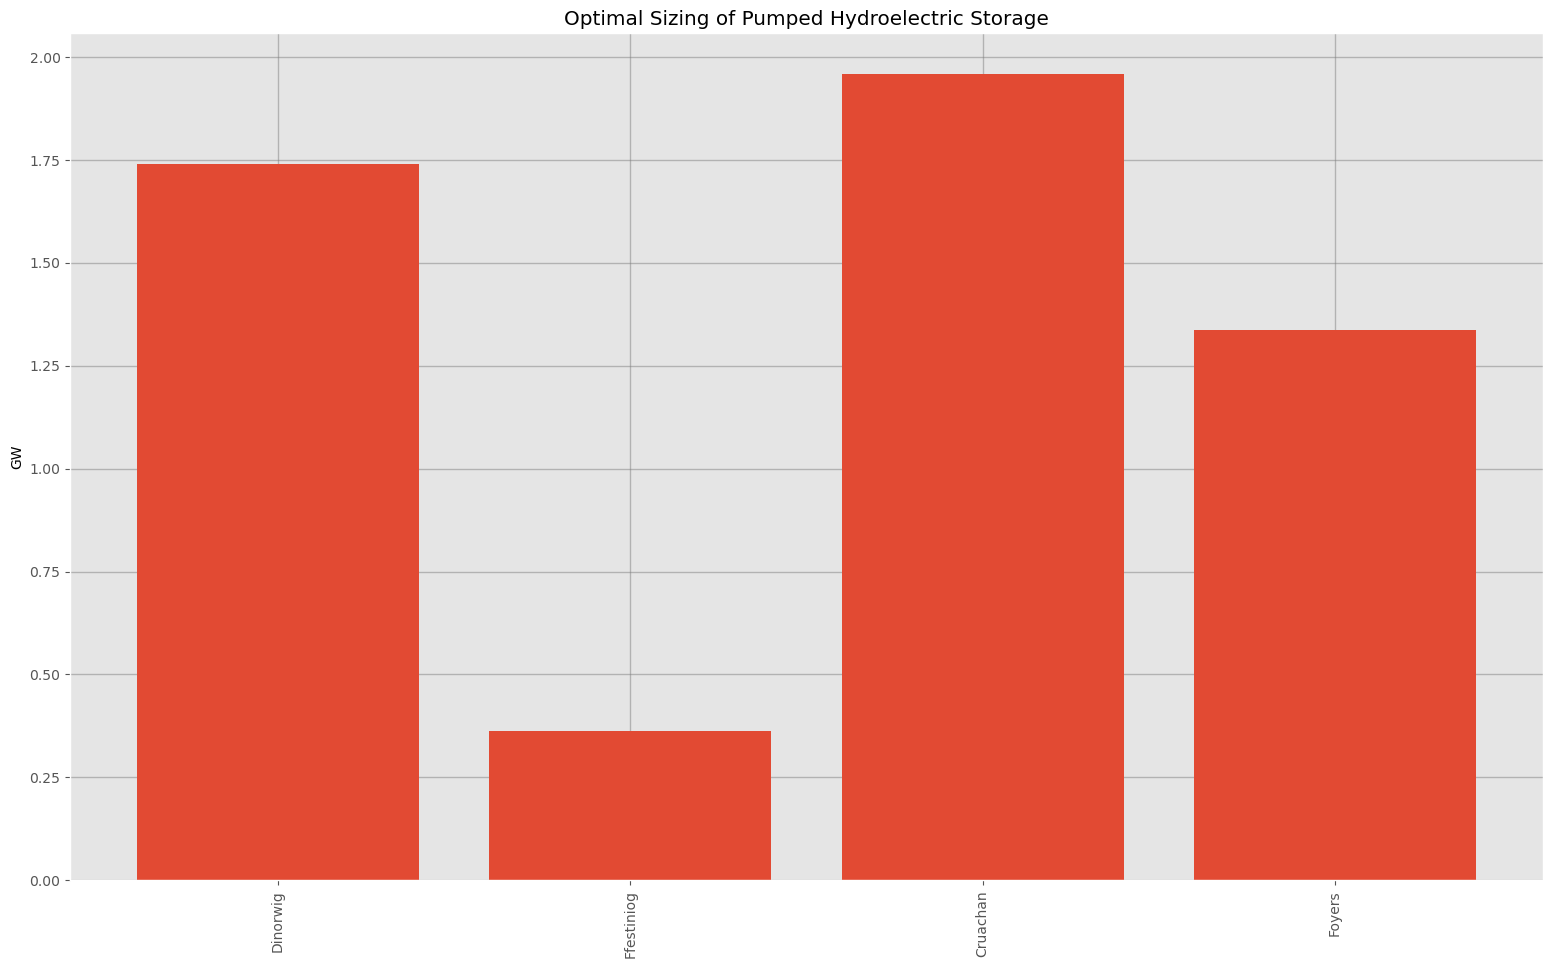

In [22]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[:4], network.storage_units.p_nom_opt[:4].div(1e3).values)

plt.xticks(network.storage_units.index[:4], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Optimal Sizing of Pumped Hydroelectric Storage')
plt.show()

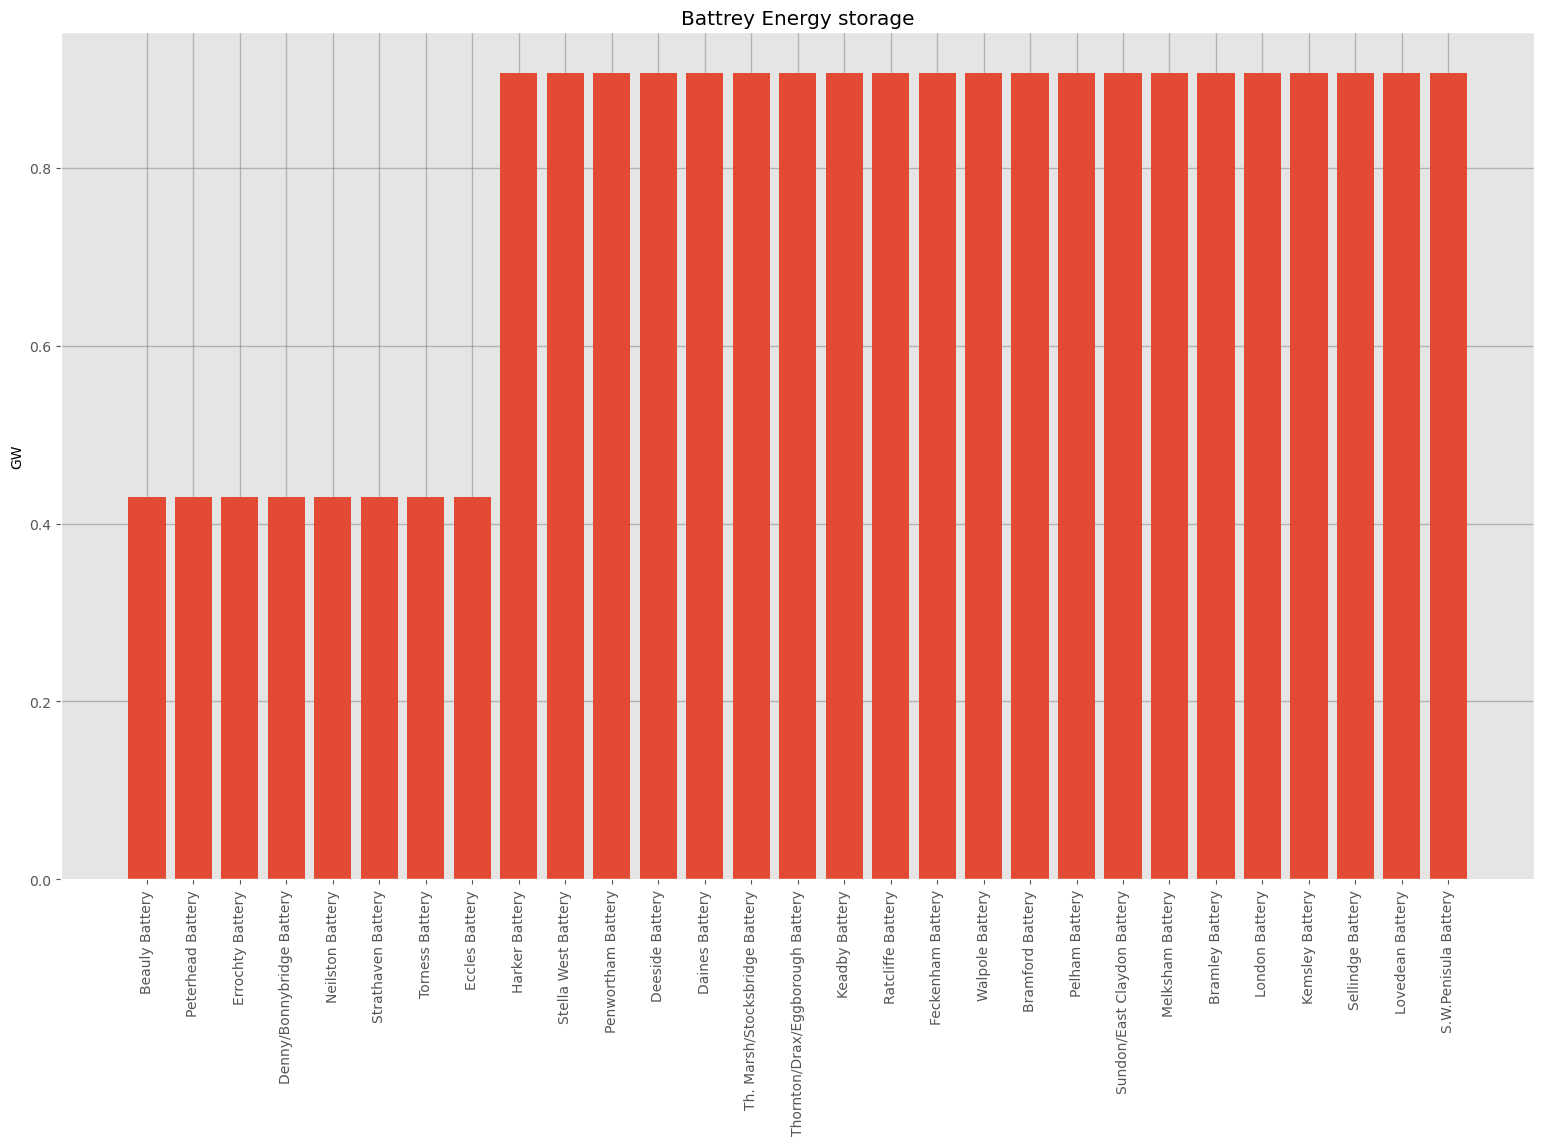

In [23]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[4:33], network.storage_units.p_nom_opt[4:33].div(1e3).values)

plt.xticks(network.storage_units.index[4:33], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Battrey Energy storage')
plt.show()

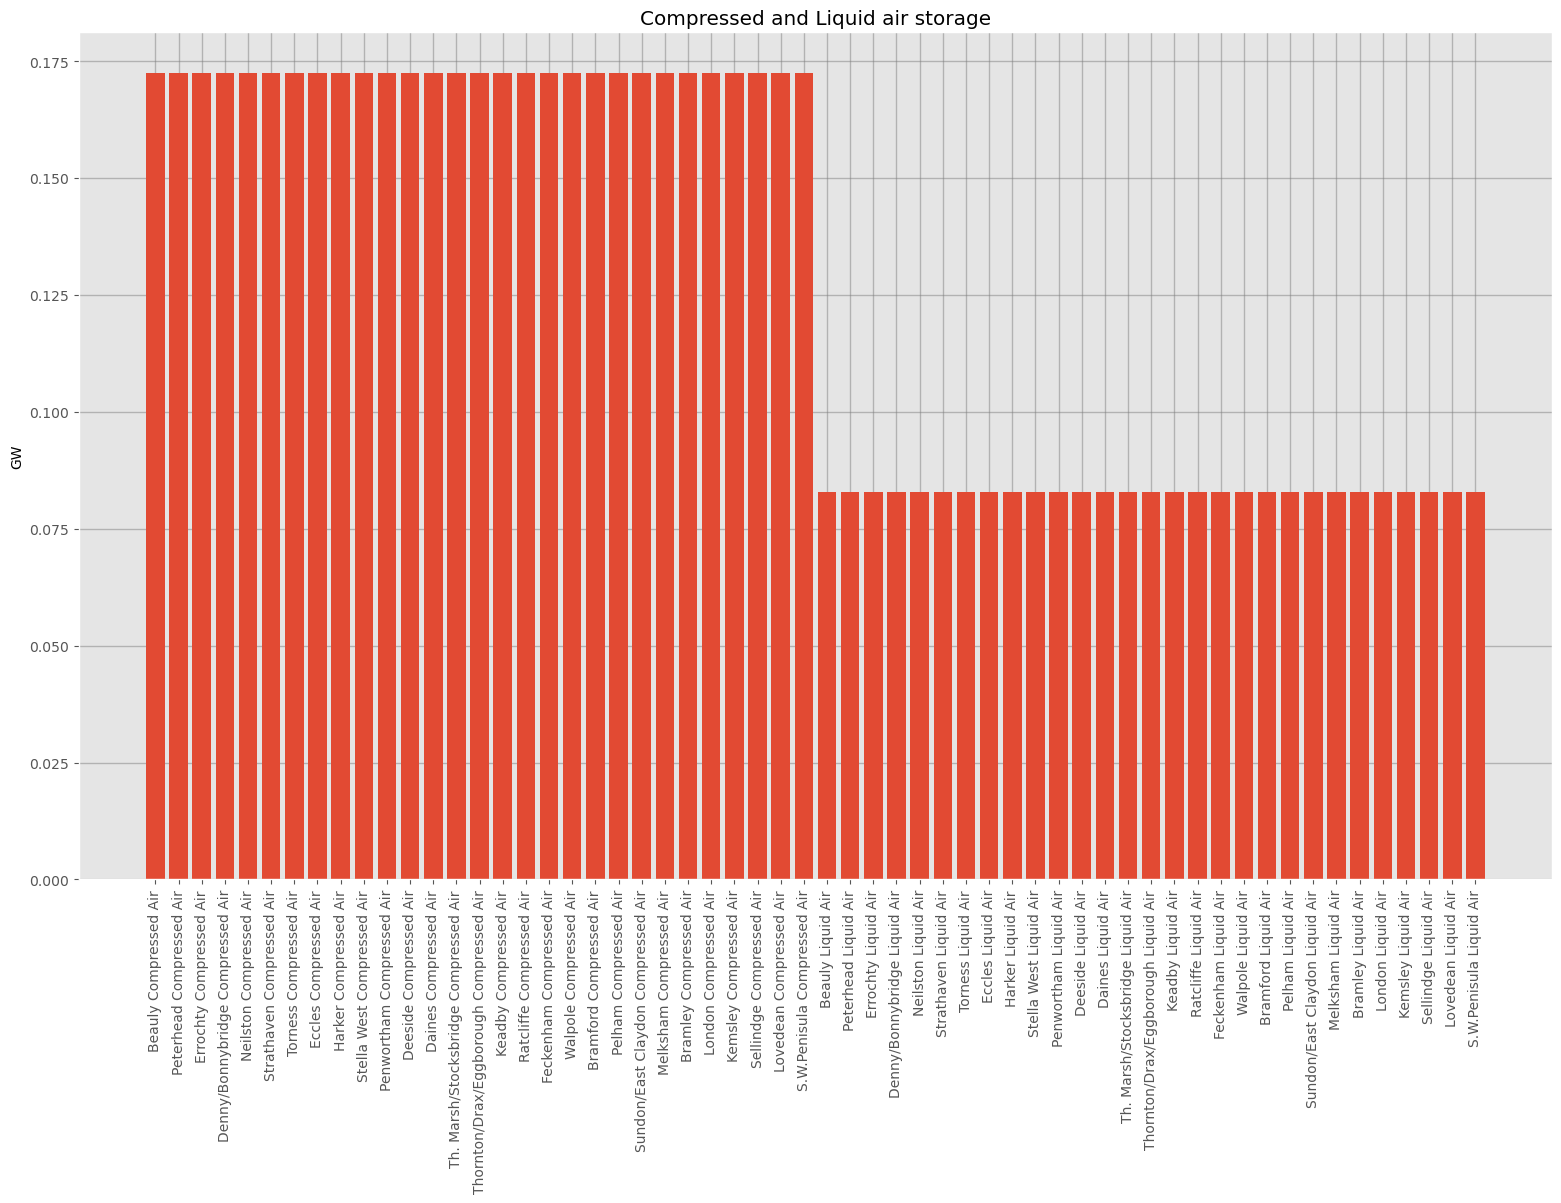

In [24]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[33:91], network.storage_units.p_nom_opt[33:91].div(1e3).values)

plt.xticks(network.storage_units.index[33:91], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Compressed and Liquid air storage')
plt.show()

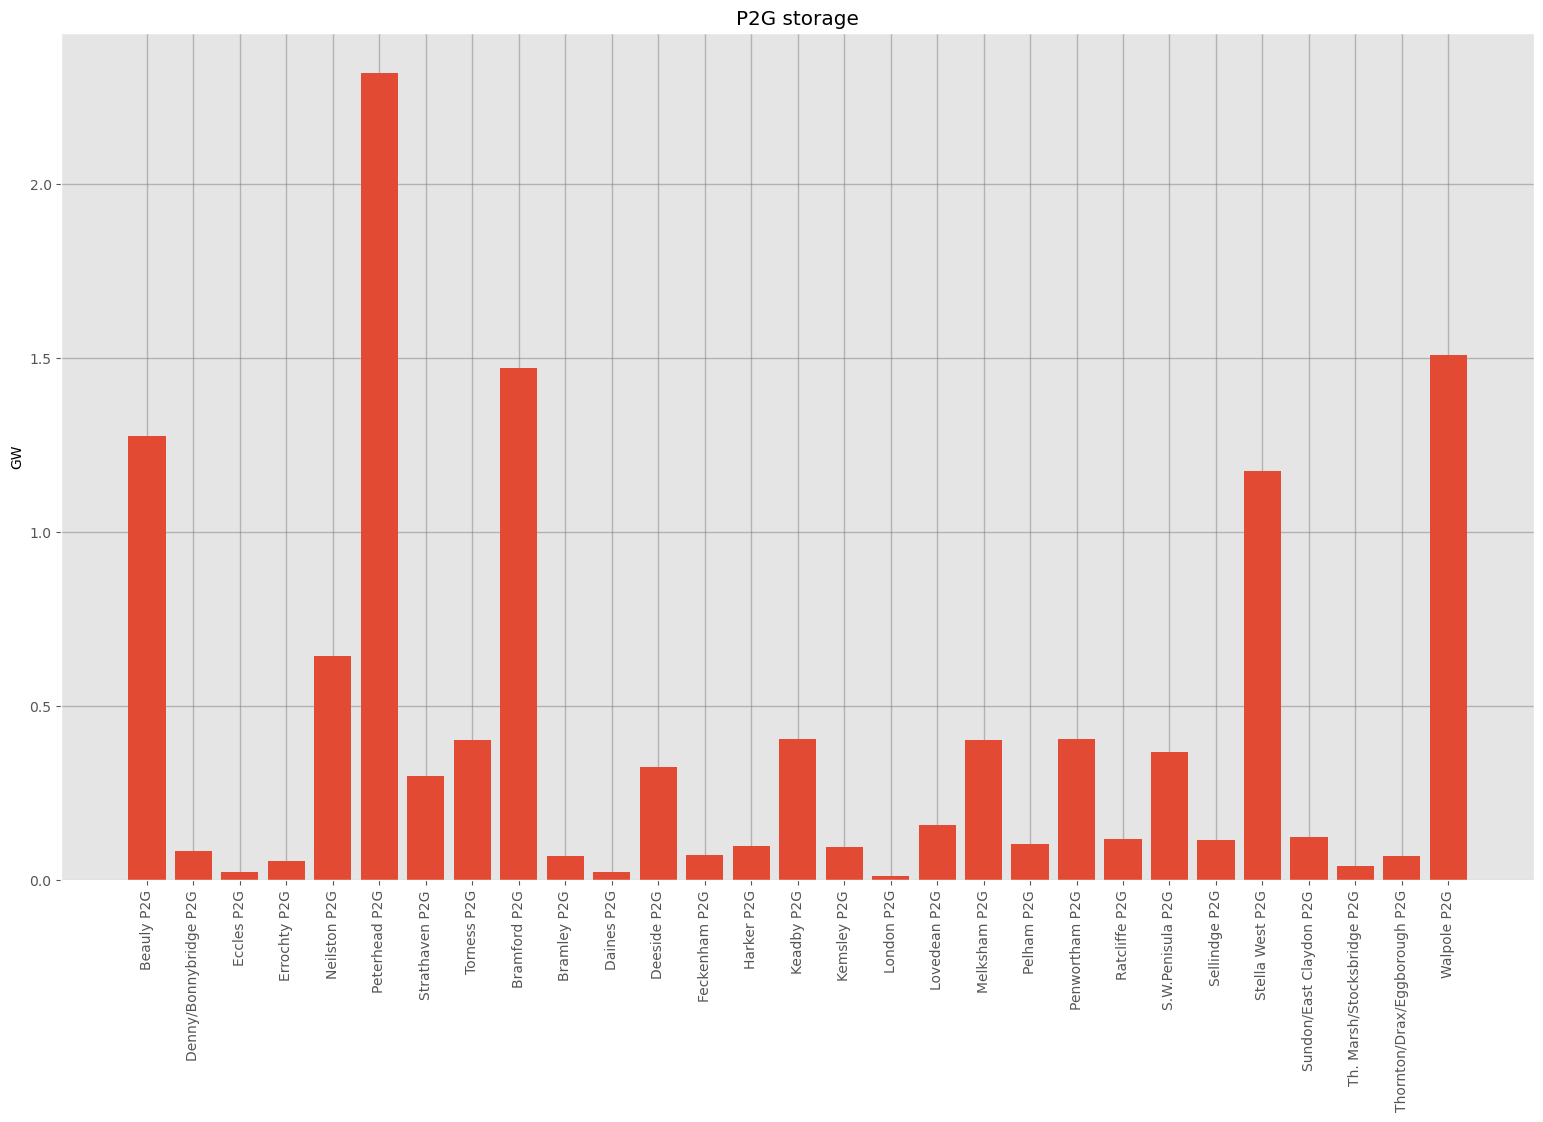

In [25]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[91:120], network.storage_units.p_nom_opt[91:120].div(1e3).values)

plt.xticks(network.storage_units.index[91:120], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('P2G storage')
plt.show()

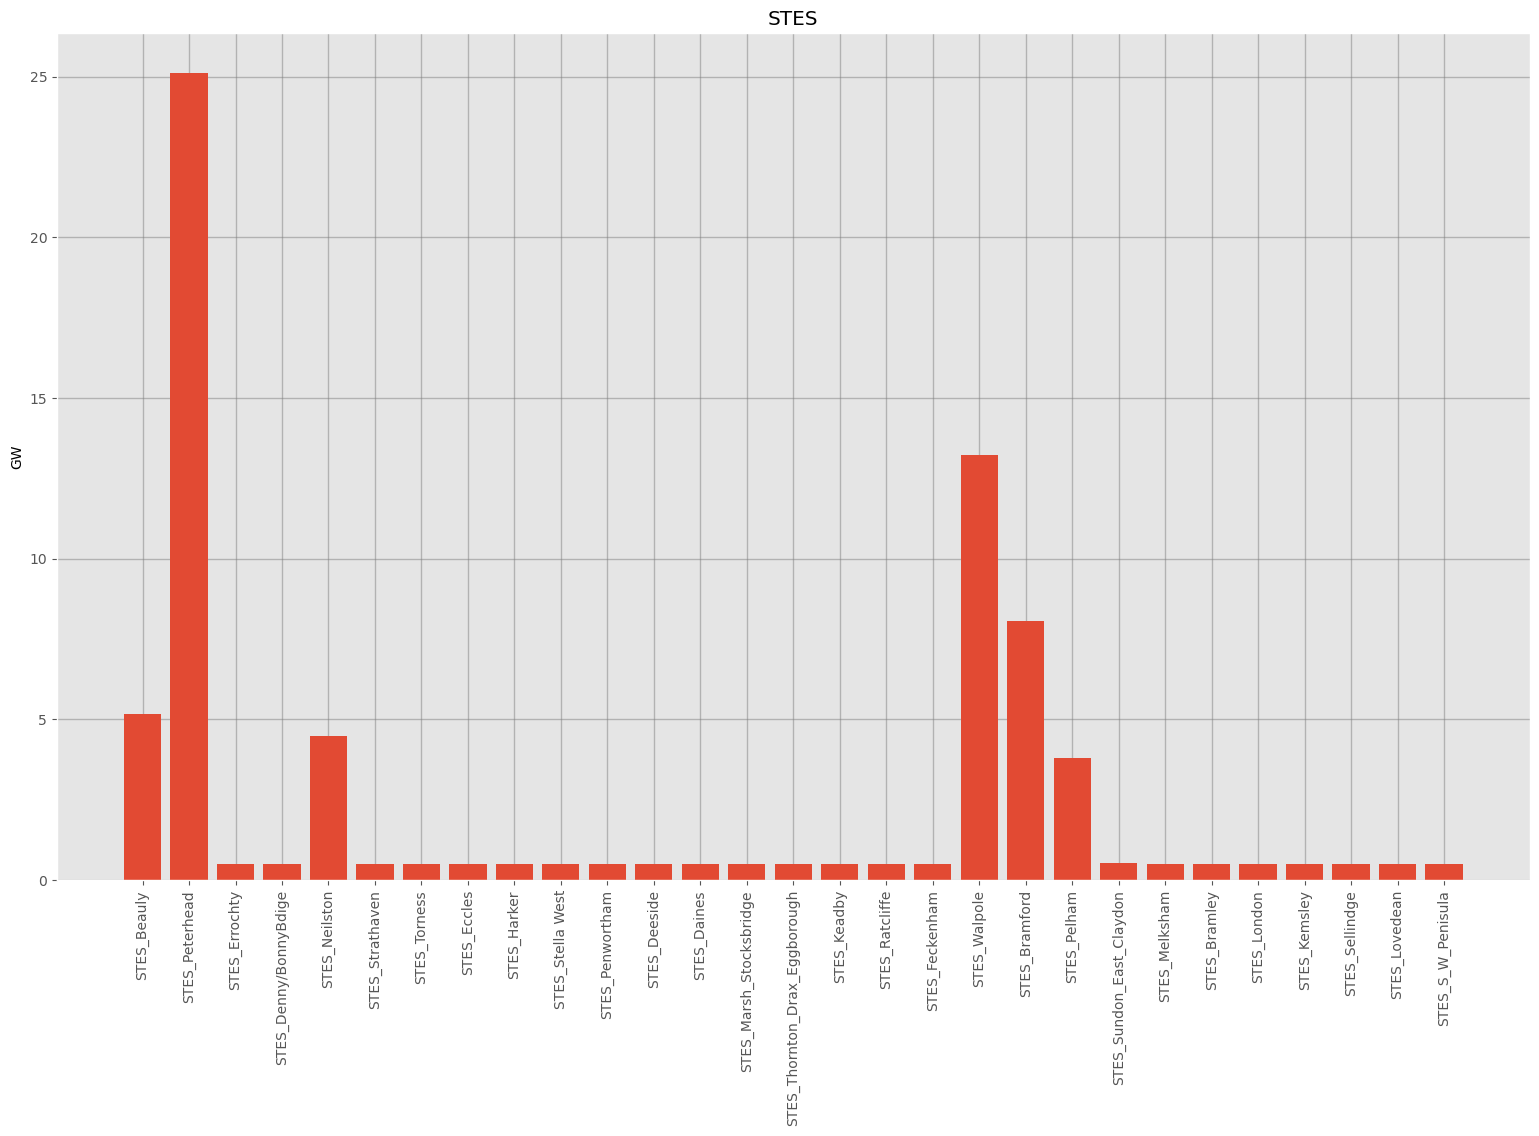

In [26]:
plt.figure(figsize=(19,11))
plt.bar(network.storage_units.index[120:150], network.storage_units.p_nom_opt[120:150].div(1e3).values)

plt.xticks(network.storage_units.index[120:150], rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('STES')
plt.show()

## Power output by generation type

Group the generators by the carrier, and print their summed power outputs over the simulation period.

In [27]:
year=2035

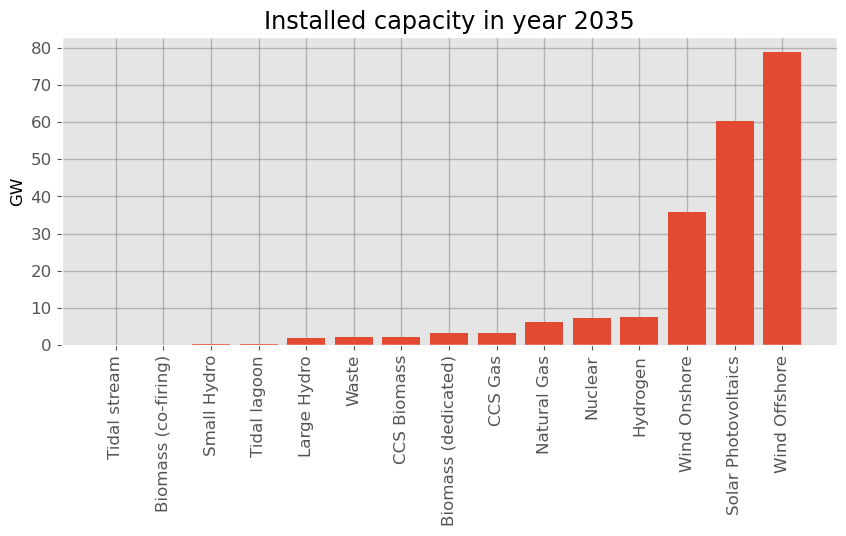

In [28]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

#imp = network.links_t.p0.copy()
#imp[imp < 0] = 0
#imp['Interconnectors Import'] = imp.sum(axis=1)
#interconnector_import = imp[['Interconnectors Import']]

#p_by_carrier = pd.concat([p_by_carrier, interconnector_import], axis=1)

#exp = network.links_t.p0.copy()
#exp[exp > 0] = 0
#exp['Interconnectors Export'] = exp.sum(axis=1)
#interconnector_export = exp[['Interconnectors Export']]

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier = p_by_carrier.rename(
    columns={'Interconnector': 'Interconnectors Import'})

generators_p_nom = network.generators.p_nom.groupby(
    network.generators.carrier).sum().sort_values()
if year > 2020:
    generators_p_nom.drop('Unmet Load', inplace=True)
generators_p_nom.drop(generators_p_nom[generators_p_nom < 50].index, inplace=True)

plt.rcParams.update({'font.size': 12})
# bar chart
plt.figure(figsize=(10,4))
plt.bar(generators_p_nom.index, generators_p_nom.values / 1000)
plt.xticks(generators_p_nom.index, rotation=90)
plt.ylabel('GW')
plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)
plt.title('Installed capacity in year ' + str(year))
plt.show()

Graph the power output of the different generation types...

Text(0.5, 0, '')

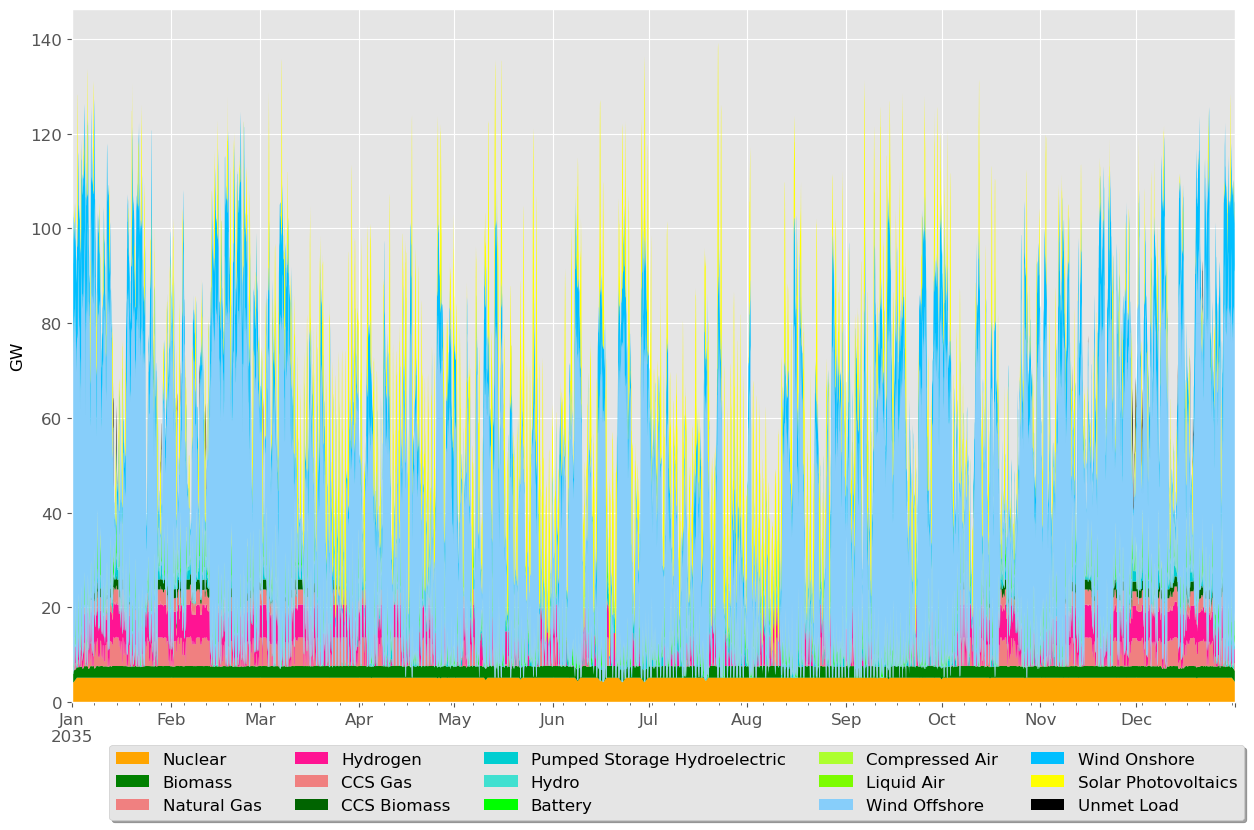

In [29]:
#cols = ["Nuclear", 'Biomass',
        #'Waste', "Oil", "Natural Gas",
       # 'Hydrogen', 'CCS Gas', 'CCS Biomass',
        #"Pumped Storage Hydroelectric", 'Hydro',
        #'Battery', 'Compressed Air', 'Liquid Air',
        #"Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        #'Interconnectors Import', 'Unmet Load'
       # ]
# ignore the import/export since the the highvoltage links are disrgearded

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
         'Unmet Load'
        ]




p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)

colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "deeppink",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# # stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
# (interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# # rescale the y axis
# ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_carrier / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.52, -0.05),
          fancybox=True, shadow=True, ncol=5)

ax.set_ylabel("GW")

ax.set_xlabel("")

## Plotting storage

Graph the pumped hydro dispatch and state of charge...

Text(0.5, 0, '')

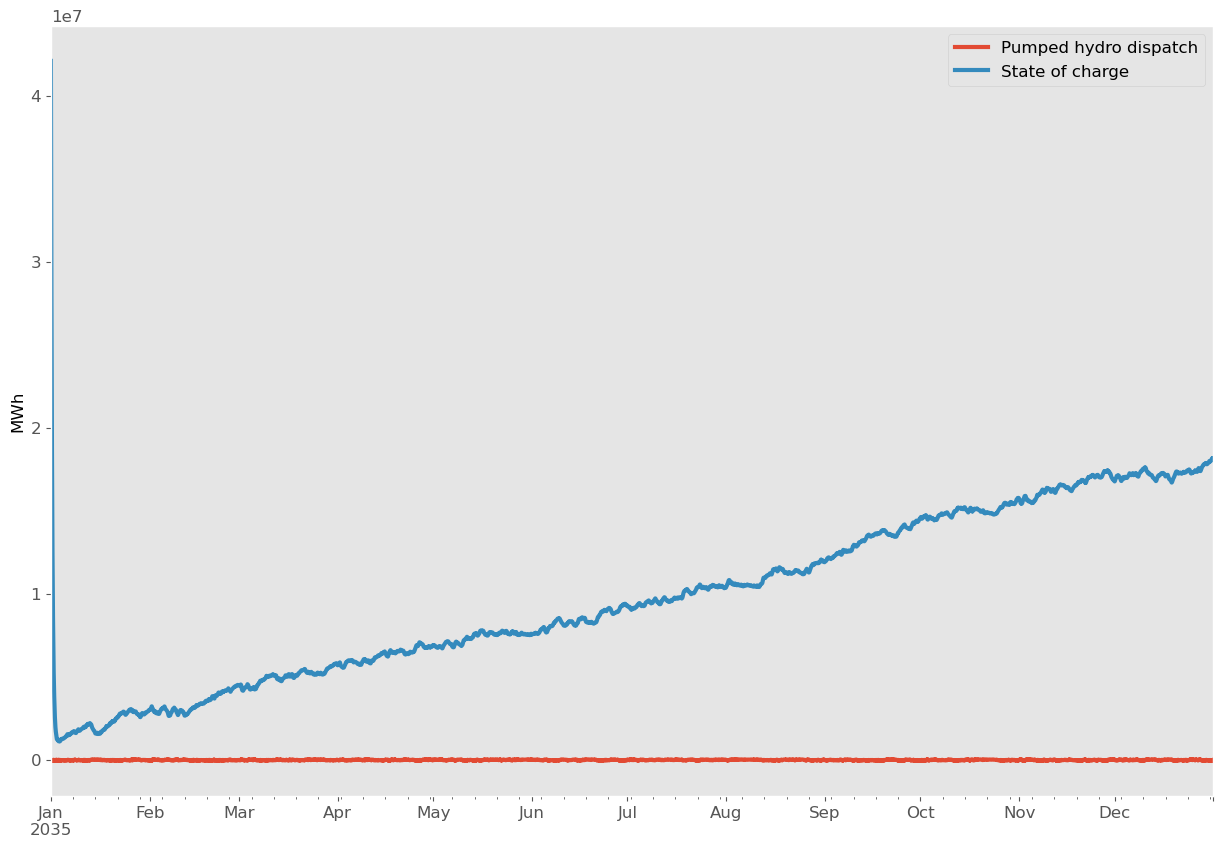

In [30]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch", ax=ax, linewidth=3)
state_of_charge.plot(label="State of charge", ax=ax, linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us plot the state of charge and dispatch for each type of storages separately

Text(0.5, 0, '')

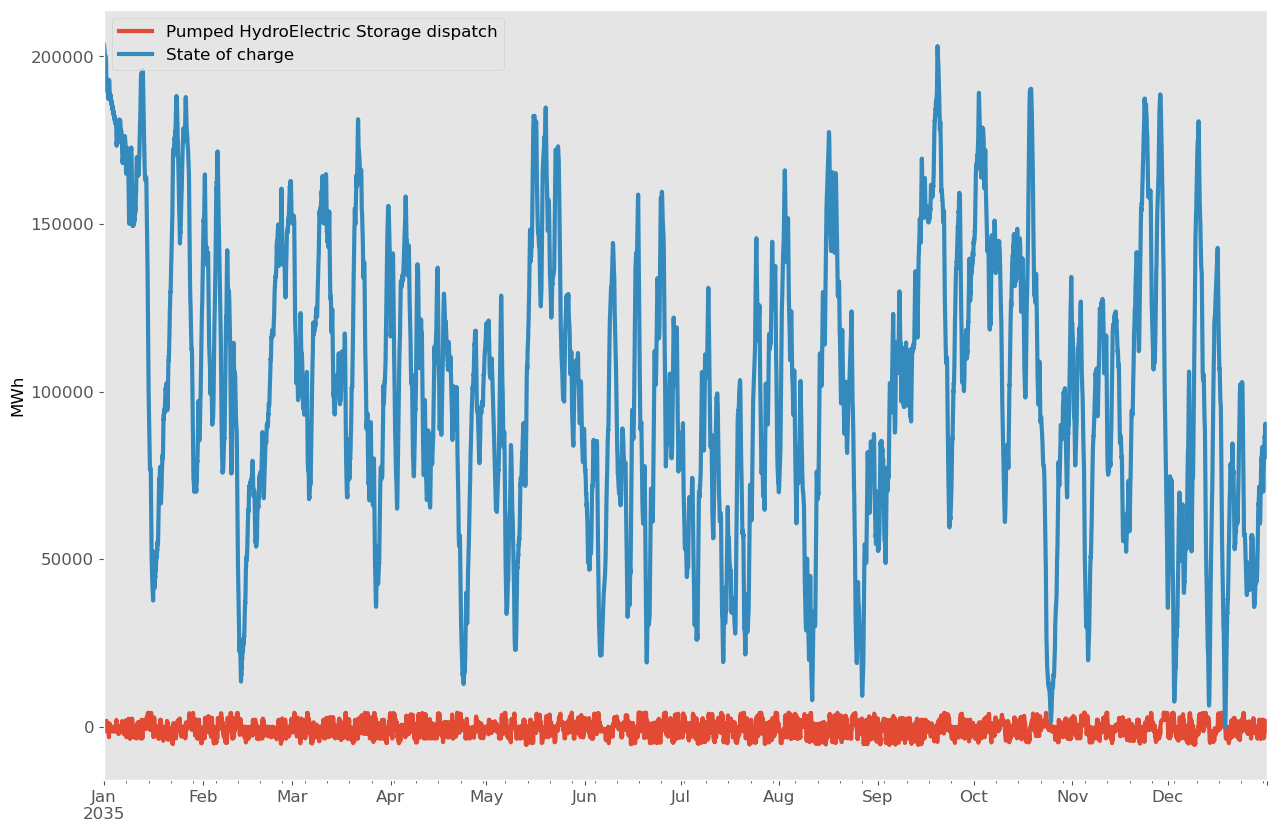

In [31]:
network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , :4].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , :4].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Pumped HydroElectric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

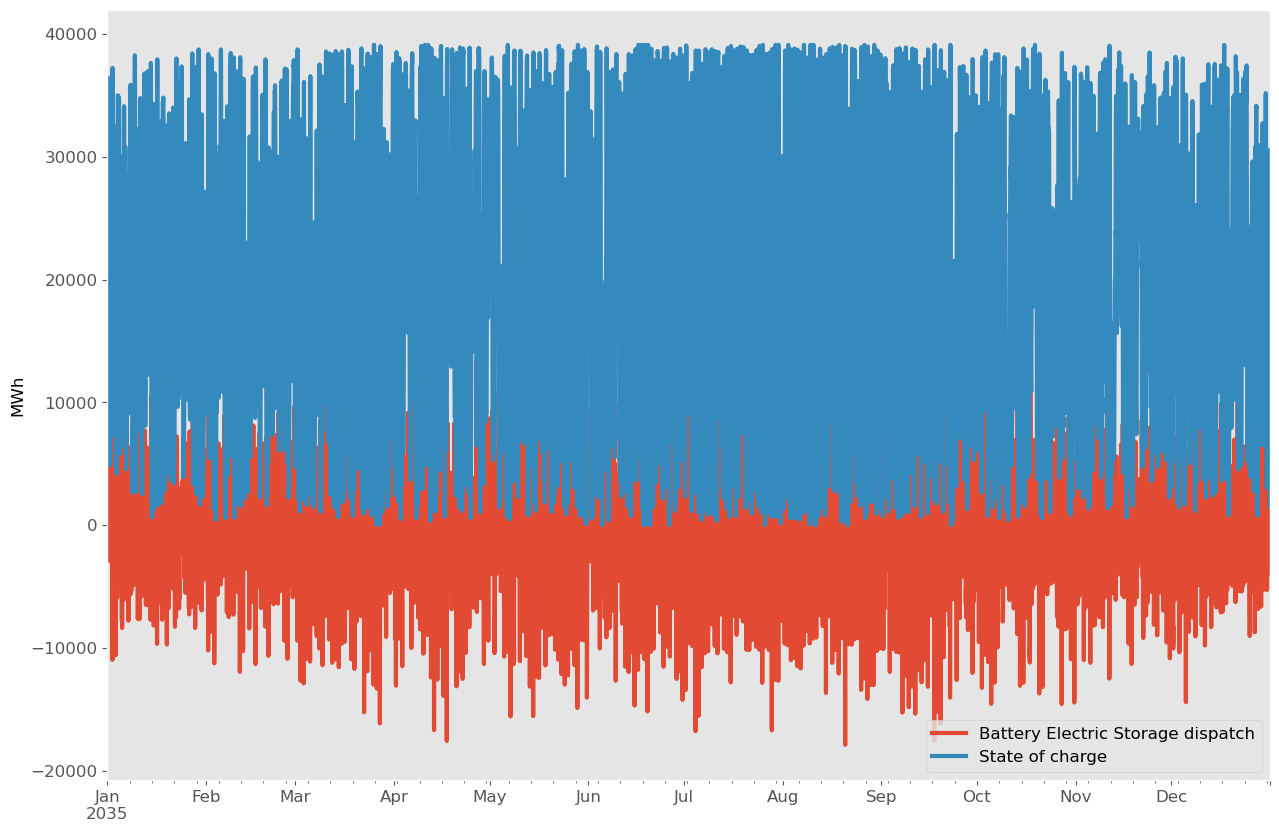

In [32]:
network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 4:33].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 4:33].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Battery Electric Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

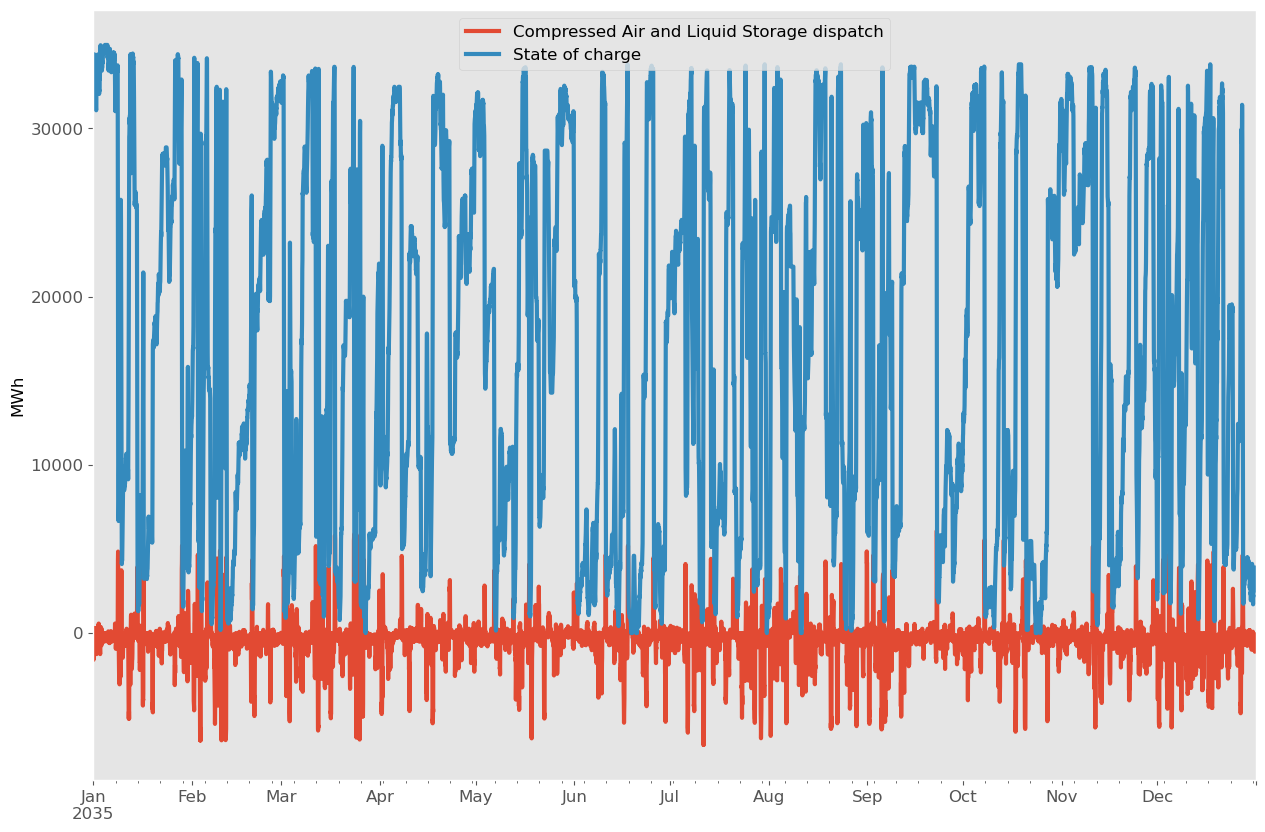

In [33]:
network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 33:91].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 33:91].sum(axis=1)


p_storage_PumpedHydorES.plot(label="Compressed Air and Liquid Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

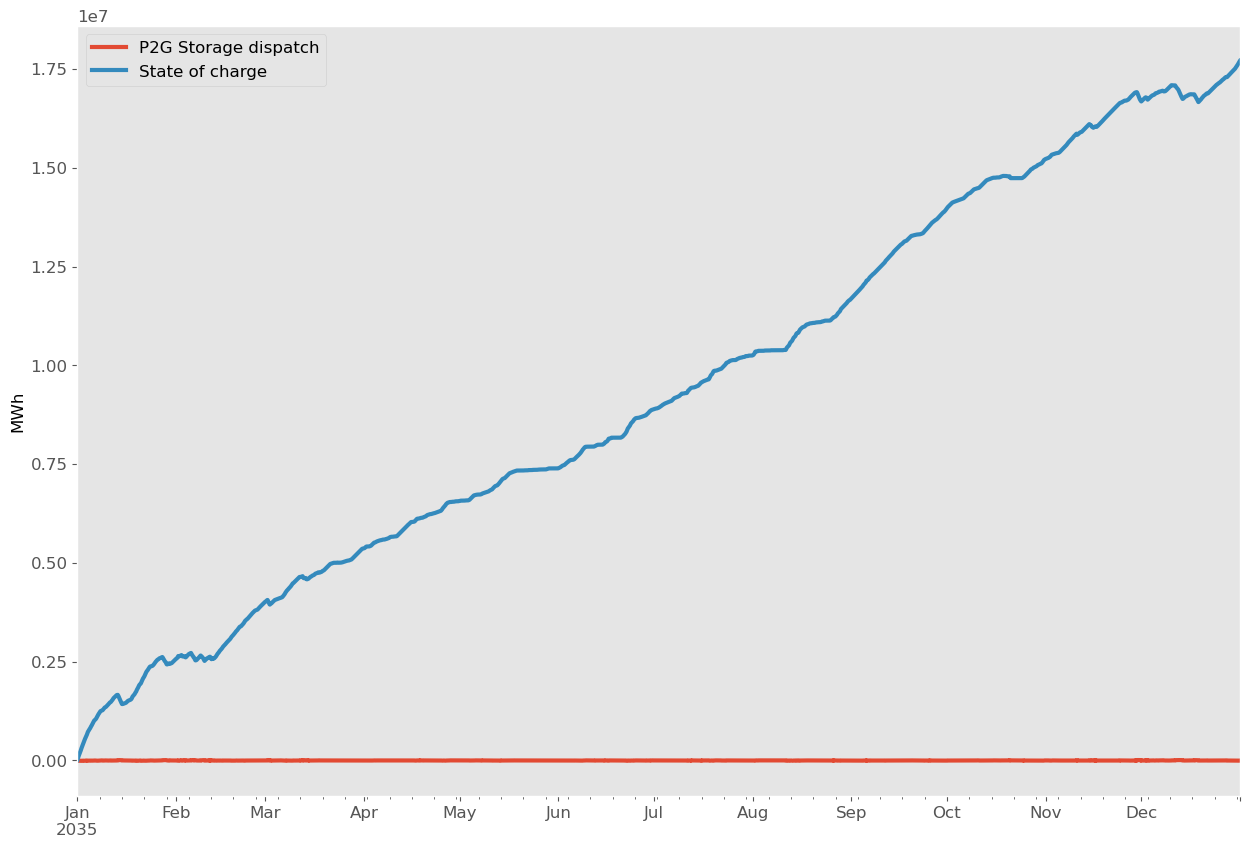

In [34]:
network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 91:120].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 91:120].sum(axis=1)


p_storage_PumpedHydorES.plot(label="P2G Storage dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")


Text(0.5, 0, '')

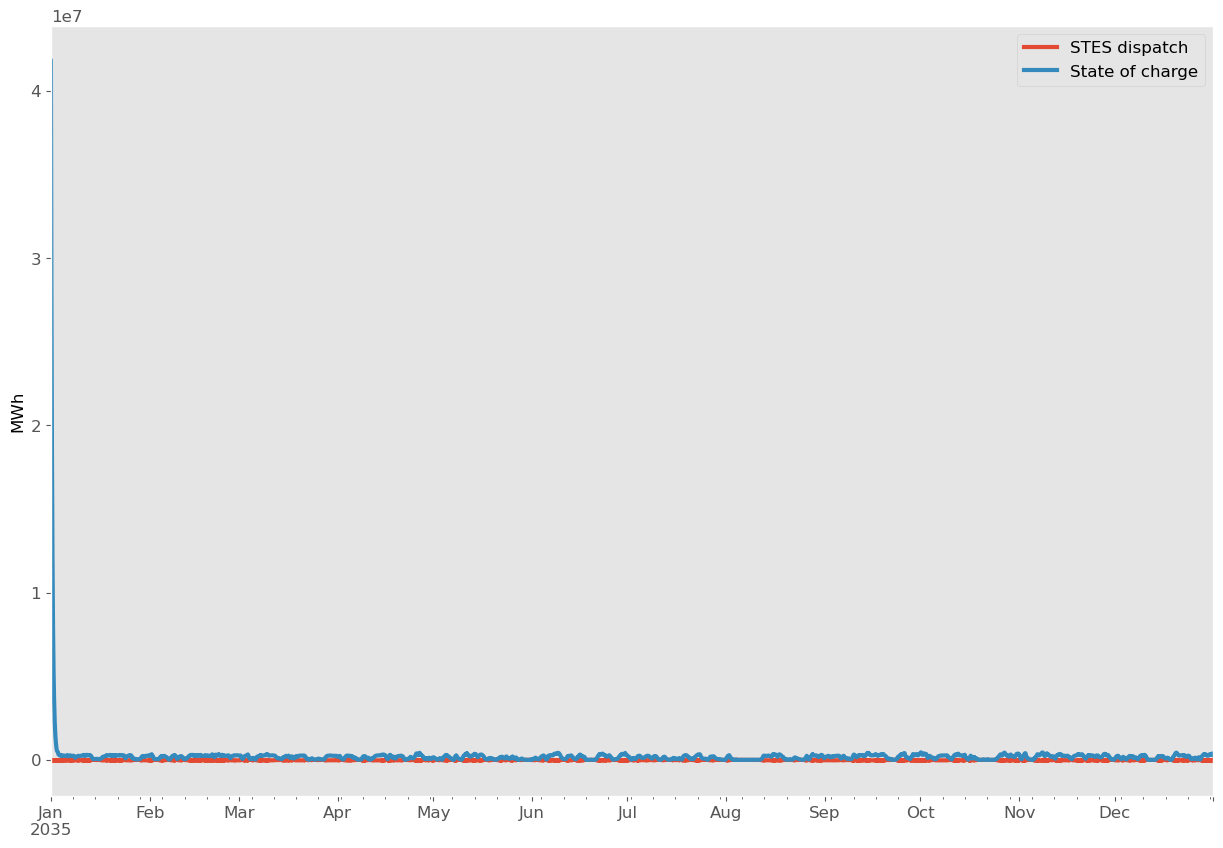

In [35]:
network.storage_units_t.state_of_charge.iloc[: , 120:150].sum(axis=1)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

p_storage_PumpedHydorES = network.storage_units_t.p.iloc[: , 120:150].sum(axis=1)

state_of_charge_PumpedHydroES = network.storage_units_t.state_of_charge.iloc[: , 120:150].sum(axis=1)


p_storage_PumpedHydorES.plot(label="STES dispatch", ax=ax, linewidth=3)
state_of_charge_PumpedHydroES.plot(label="State of charge", ax=ax, linewidth=3)
ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

Let us add dditional constraint to the seasonal thermal energy storage and solve our model again with the conservative constraints included on Storages

In [36]:
sus=Linopy_model.variables['StorageUnit-state_of_charge']      # how to apply this for STES only?
Linopy_model.add_constraints(sus>=200,name='StorageUnit_minimum_soc')

Constraint `StorageUnit_minimum_soc` (snapshot: 8760, StorageUnit: 149)
-----------------------------------------------------------------------
[2035-01-01 00:00:00, Dinorwig]:          1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Dinorwig]          >= 200
[2035-01-01 00:00:00, Ffestiniog]:        1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Ffestiniog]        >= 200
[2035-01-01 00:00:00, Cruachan]:          1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Cruachan]          >= 200
[2035-01-01 00:00:00, Foyers]:            1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Foyers]            >= 200
[2035-01-01 00:00:00, Beauly Battery]:    1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Beauly Battery]    >= 200
[2035-01-01 00:00:00, Peterhead Battery]: 1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Peterhead Battery] >= 200
[2035-01-01 00:00:00, Errochty Battery]:  1.0 StorageUnit-state_of_charge[2035-01-01 00:00:00, Errochty Battery]  >= 200
		...
[20

In [37]:
# then solve the model
#network.optimize.solve_model(solver_name='gurobi')
network.optimize(solver_name='gurobi')

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-fix-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_up` to match existing coordinates.
  warnings.warn(
C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\linopy\model.py:607: UserWarning: Reindexing constraint `Generator-ext-p-ramp_limit_down` to match existing coordinates.
  warnings.warn(
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
INFO:linopy.model: Solve linear problem using Gu

Read LP format model from file C:\Users\salene\AppData\Local\Temp\linopy-problem-kyl20mh4.lp
Reading time = 60.87 seconds
obj: 28661856 rows, 9075419 columns, 51603167 nonzeros
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1185G7 @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 28661856 rows, 9075419 columns and 51603167 nonzeros
Model fingerprint: 0x259b48d3
Coefficient statistics:
  Matrix range     [6e-05, 3e+03]
  Objective range  [1e+00, 1e+09]
  Bounds range     [1e+07, 1e+07]
  RHS range        [8e-07, 2e+12]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 25359348 rows and 30 columns (presolve time = 5s) ...
Presolve removed 25359348 rows and 702137 columns (presolve time = 11s) ...
Presolve removed 25359348 rows and 702137 columns (presolve time = 15s

  85   4.27150135e+14  4.27141853e+14  2.78e-06 5.39e+01  6.62e+02  1036s
  86   4.27150043e+14  4.27142172e+14  2.78e-06 6.20e+01  6.29e+02  1049s
  87   4.27149985e+14  4.27142299e+14  2.28e-06 5.97e+01  6.14e+02  1061s
  88   4.27149886e+14  4.27142762e+14  2.31e-06 6.28e+01  5.69e+02  1074s
  89   4.27149713e+14  4.27142959e+14  2.46e-06 5.43e+01  5.40e+02  1088s
  90   4.27149601e+14  4.27143211e+14  2.58e-06 3.23e+01  5.11e+02  1102s
  91   4.27149540e+14  4.27143329e+14  2.01e-06 3.22e+01  4.96e+02  1115s
  92   4.27149423e+14  4.27143747e+14  1.24e-06 3.07e+01  4.54e+02  1127s
  93   4.27149367e+14  4.27143788e+14  1.18e-06 3.05e+01  4.46e+02  1138s
  94   4.27149295e+14  4.27143887e+14  9.93e-07 3.06e+01  4.32e+02  1151s
  95   4.27149265e+14  4.27144070e+14  9.83e-07 3.20e+01  4.15e+02  1164s
  96   4.27149194e+14  4.27144234e+14  1.02e-06 2.73e+01  3.97e+02  1177s
  97   4.27149167e+14  4.27144402e+14  9.96e-07 2.36e+01  3.81e+02  1187s
  98   4.27149083e+14  4.27144577e+14 

 196   4.27147658e+14  4.27147629e+14  1.03e-05 2.35e+03  2.56e+00  2486s
 197   4.27147657e+14  4.27147630e+14  1.02e-05 2.19e+03  2.41e+00  2499s
 198   4.27147656e+14  4.27147630e+14  1.02e-05 1.88e+03  2.25e+00  2511s
 199   4.27147655e+14  4.27147631e+14  1.02e-05 1.85e+03  2.16e+00  2523s
 200   4.27147654e+14  4.27147631e+14  1.06e-05 1.76e+03  2.01e+00  2536s
 201   4.27147653e+14  4.27147632e+14  1.10e-05 1.65e+03  1.92e+00  2549s
 202   4.27147653e+14  4.27147632e+14  1.09e-05 1.58e+03  1.82e+00  2562s
 203   4.27147652e+14  4.27147632e+14  1.06e-05 1.50e+03  1.74e+00  2574s
 204   4.27147652e+14  4.27147633e+14  9.34e-06 1.44e+03  1.64e+00  2585s
 205   4.27147651e+14  4.27147633e+14  9.61e-06 1.36e+03  1.53e+00  2599s
 206   4.27147650e+14  4.27147634e+14  9.82e-06 1.29e+03  1.42e+00  2612s
 207   4.27147649e+14  4.27147634e+14  9.60e-06 1.20e+03  1.34e+00  2625s
 208   4.27147649e+14  4.27147634e+14  9.13e-06 1.10e+03  1.26e+00  2638s
 209   4.27147648e+14  4.27147635e+14 

 1579880 PPushes remaining with PInf 4.1906504e+02              4055s
 1572029 PPushes remaining with PInf 4.1900782e+02              4061s
 1567671 PPushes remaining with PInf 4.1891054e+02              4066s
 1561386 PPushes remaining with PInf 4.1888777e+02              4071s
 1556559 PPushes remaining with PInf 4.1886127e+02              4075s
 1546909 PPushes remaining with PInf 4.1883353e+02              4085s
 1542463 PPushes remaining with PInf 4.1882955e+02              4089s
 1532177 PPushes remaining with PInf 4.1864516e+02              4094s
 1527185 PPushes remaining with PInf 4.1844627e+02              4099s
 1522663 PPushes remaining with PInf 3.9689768e+02              4104s
 1517741 PPushes remaining with PInf 3.9684627e+02              4108s
 1513717 PPushes remaining with PInf 3.9678218e+02              4113s
 1509939 PPushes remaining with PInf 3.9673179e+02              4119s
 1507235 PPushes remaining with PInf 3.9665731e+02              4123s
 1503527 PPushes rem

  416490 PPushes remaining with PInf 3.5957330e+02              6868s
  409677 PPushes remaining with PInf 3.5955999e+02              6885s
  403232 PPushes remaining with PInf 3.5948591e+02              6904s
  397108 PPushes remaining with PInf 3.5945995e+02              6919s
  391115 PPushes remaining with PInf 3.5942140e+02              6936s
  385527 PPushes remaining with PInf 3.5939891e+02              6949s
  380060 PPushes remaining with PInf 3.5939627e+02              6963s
  374660 PPushes remaining with PInf 3.5939383e+02              6977s
  369450 PPushes remaining with PInf 3.5939031e+02              6988s
  363177 PPushes remaining with PInf 3.5939014e+02              7002s
  357431 PPushes remaining with PInf 3.5938857e+02              7015s
  351091 PPushes remaining with PInf 3.5938343e+02              7027s
  344970 PPushes remaining with PInf 3.5936956e+02              7038s
  339028 PPushes remaining with PInf 3.5935325e+02              7049s
  333269 PPushes rem

 4396188    4.2714764e+14   0.000000e+00   1.230866e+06   7786s
 4396995    4.2714764e+14   0.000000e+00   9.000192e+05   7795s
 4397791    4.2714764e+14   0.000000e+00   7.527313e+05   7804s
 4398587    4.2714764e+14   0.000000e+00   6.674904e+05   7811s
 4399385    4.2714764e+14   0.000000e+00   5.783135e+05   7819s
 4400180    4.2714764e+14   0.000000e+00   5.160928e+05   7828s
 4400978    4.2714764e+14   0.000000e+00   4.606774e+05   7836s
 4401773    4.2714764e+14   0.000000e+00   4.200949e+05   7843s
 4402568    4.2714764e+14   0.000000e+00   1.690653e+05   7852s
 4403366    4.2714764e+14   0.000000e+00   1.462934e+05   7859s
 4404165    4.2714764e+14   0.000000e+00   1.525346e+05   7869s
 4404961    4.2714764e+14   0.000000e+00   1.054660e+05   7876s
 4405862    4.2714764e+14   0.000000e+00   1.843399e+05   7884s
 4406657    4.2714764e+14   0.000000e+00   7.237996e+04   7893s
 4407638    4.2714764e+14   0.000000e+00   6.163385e+04   7901s
 4408434    4.2714764e+14   0.000000e+00

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 9075419 primals, 28661856 duals
Objective: 4.27e+14
Solver model: available
Solver message: 2



('ok', 'optimal')

## Plotting line loading

Look at the line loading stats and graph...

In [38]:
now = network.snapshots[60]

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[now] / network.lines.s_nom
loading.describe()

With the linear load flow, there is the following per unit loading:


count    99.000000
mean      0.074057
std       0.359933
min      -0.700000
25%      -0.181504
50%       0.090630
75%       0.273233
max       0.700000
dtype: float64

(<matplotlib.collections.PatchCollection at 0x15348b4ef70>,
 <matplotlib.collections.LineCollection at 0x15348b61160>)

C:\Users\salene\Anaconda3\envs\PyPSA-GB\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


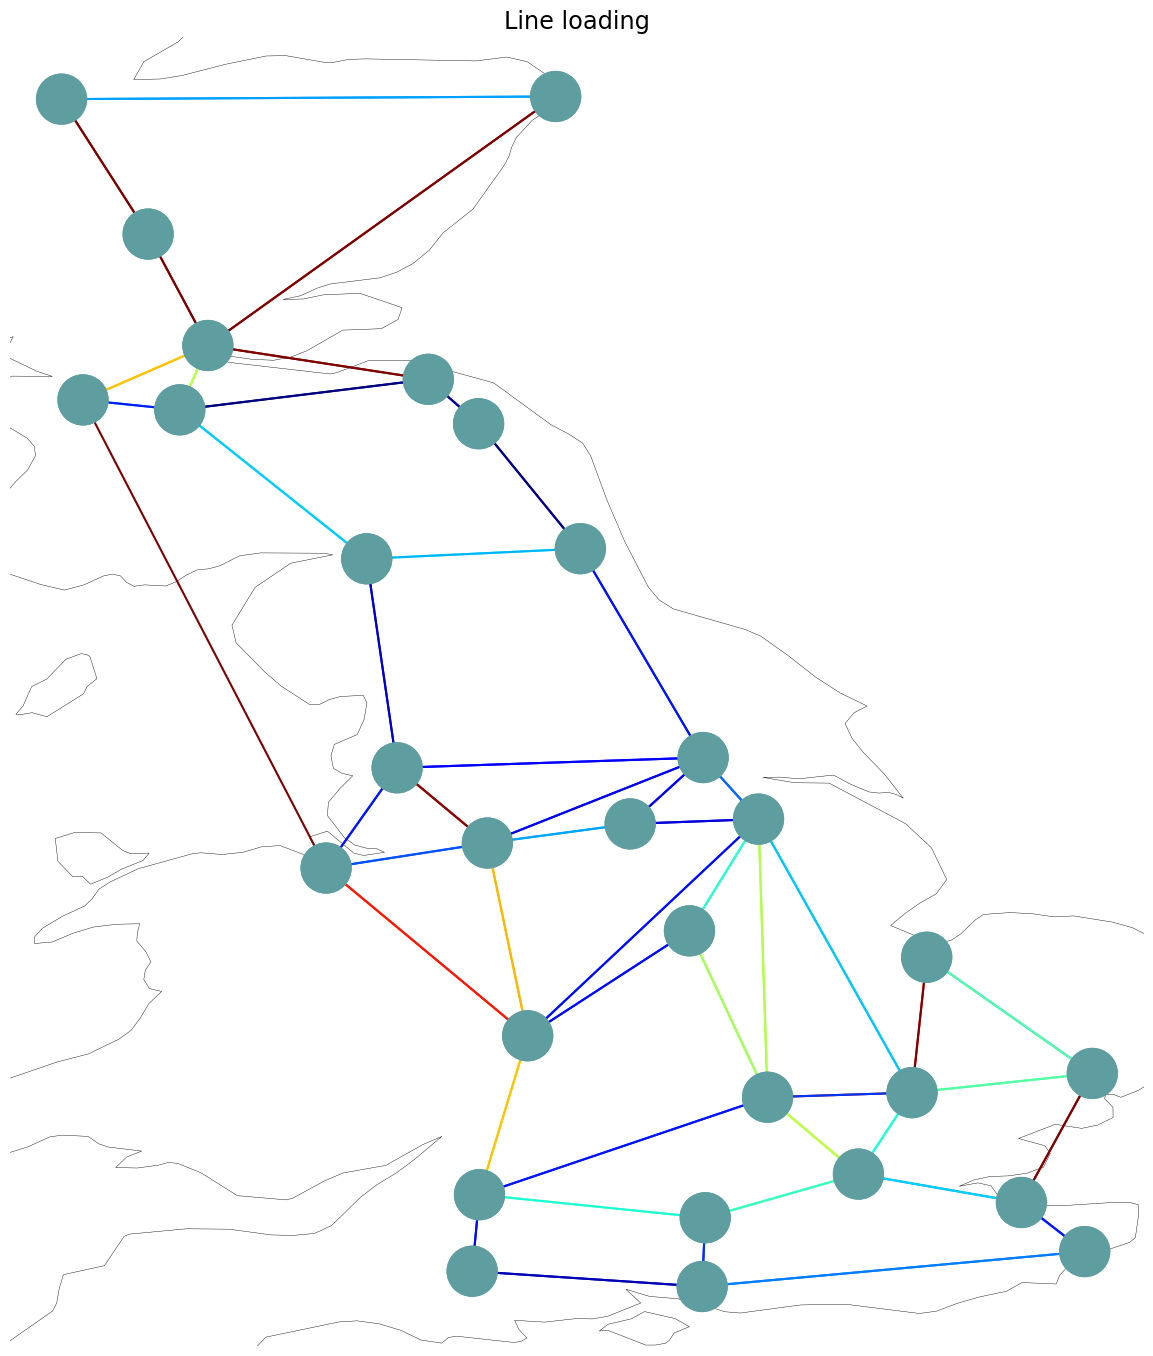

In [39]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading")

## Plotting locational marginal prices

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

network.plot(ax=ax, line_widths=pd.Series(0.5, network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[now],
           cmap=plt.cm.jet)

# for some reason the colorbar only works with graphs plt.plot
# and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (£/MWh)')

In [41]:
network.buses_t.marginal_price

,Eccles,Errochty,Heat Bus 1,Heat Bus 10,Heat Bus 11,Heat Bus 12,Heat Bus 13,Heat Bus 14,Heat Bus 15,Heat Bus 16,...,Th. Marsh/Stocksbridge,Bramford,Beauly,Penwortham,Denny/Bonnybridge,Neilston,Pelham,Peterhead,Harker,Bramley
snapshot,,,,,,,,,,,,,,,,,,,,,
2035-01-01 00:00:00,-0.605518,-0.000000,-0.417537,-0.380373,20.0,20.0,20.0,20.0,20.0,20.0,...,62.562113,-1.0,-1.0,53.570000,-0.216165,-1.0,-1.000000,-1.0,15.872926,74.553679
2035-01-01 01:00:00,-0.605518,0.200254,-0.417537,-0.379075,20.0,20.0,20.0,20.0,20.0,20.0,...,58.104270,-1.0,-1.0,53.930000,-0.216165,-1.0,-1.000000,-1.0,15.976285,69.436048
2035-01-01 02:00:00,-0.605518,0.226261,-0.417537,-0.367226,20.0,20.0,20.0,20.0,20.0,20.0,...,58.673570,-1.0,-1.0,54.470000,-0.248047,-1.0,-1.000000,-1.0,16.072195,70.128977
2035-01-01 03:00:00,1.262118,3.494826,-0.409836,-0.377786,20.0,20.0,20.0,20.0,20.0,20.0,...,59.221660,-1.0,-1.0,54.560000,3.494826,-1.0,-1.000000,-1.0,21.864029,69.896175
2035-01-01 04:00:00,1.251125,3.472983,-0.388350,-0.379075,20.0,20.0,20.0,20.0,20.0,20.0,...,58.924113,-0.0,-1.0,54.290000,3.472983,-1.0,-1.344791,-1.0,21.752919,69.335438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035-12-31 19:00:00,47.534951,49.085873,-0.000000,20.000000,20.0,20.0,20.0,20.0,20.0,20.0,...,74.566792,-0.0,-1.0,52.126898,47.109813,46.1,-0.000000,-1.0,48.800000,88.036261
2035-12-31 20:00:00,47.509133,49.085873,-0.000000,20.000000,20.0,20.0,20.0,20.0,20.0,20.0,...,74.567328,-0.0,-1.0,51.918696,47.236305,47.0,-0.000000,-1.0,48.530000,88.036467
2035-12-31 21:00:00,47.436473,49.085873,-0.000000,20.000000,20.0,20.0,20.0,20.0,20.0,20.0,...,74.482485,-0.0,-1.0,51.398372,46.720301,46.1,-0.000000,-1.0,47.930433,88.024938


## Plotting curtailment

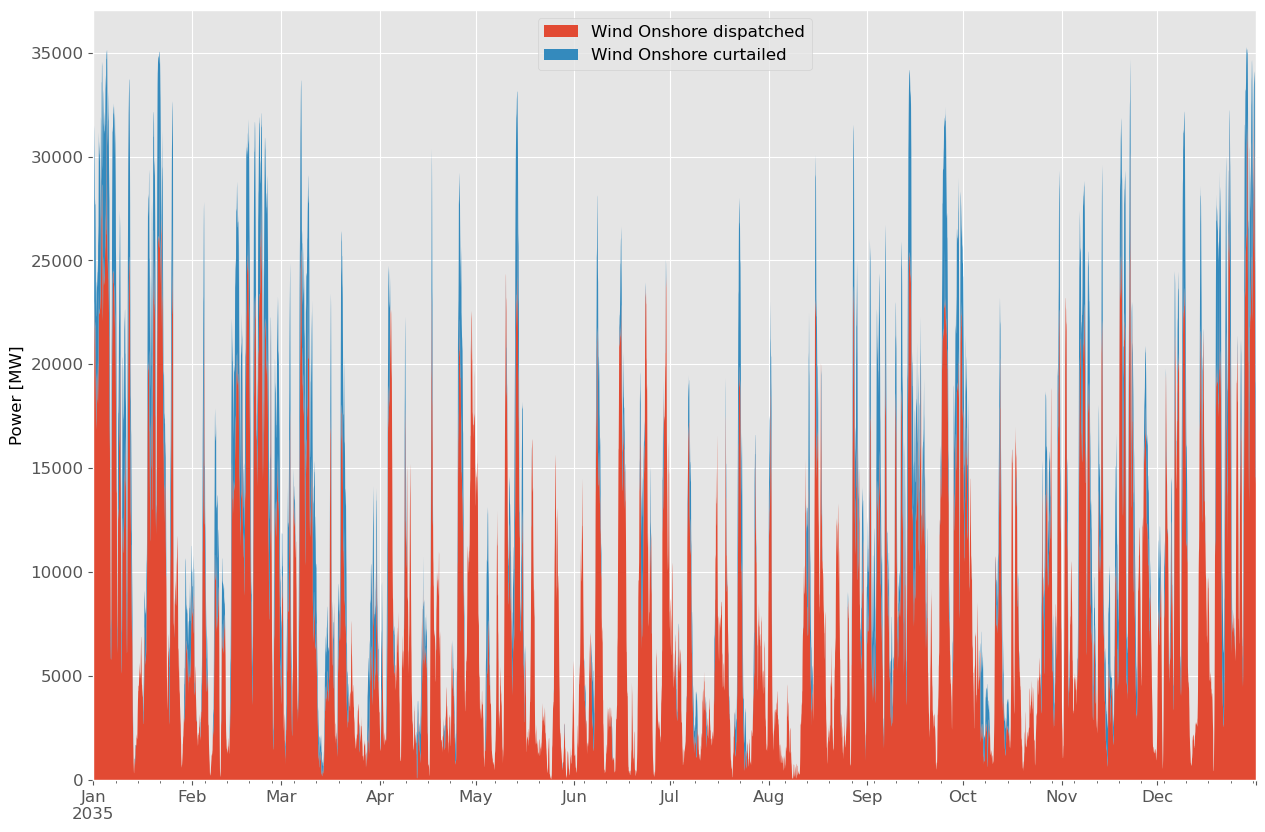

In [42]:
carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

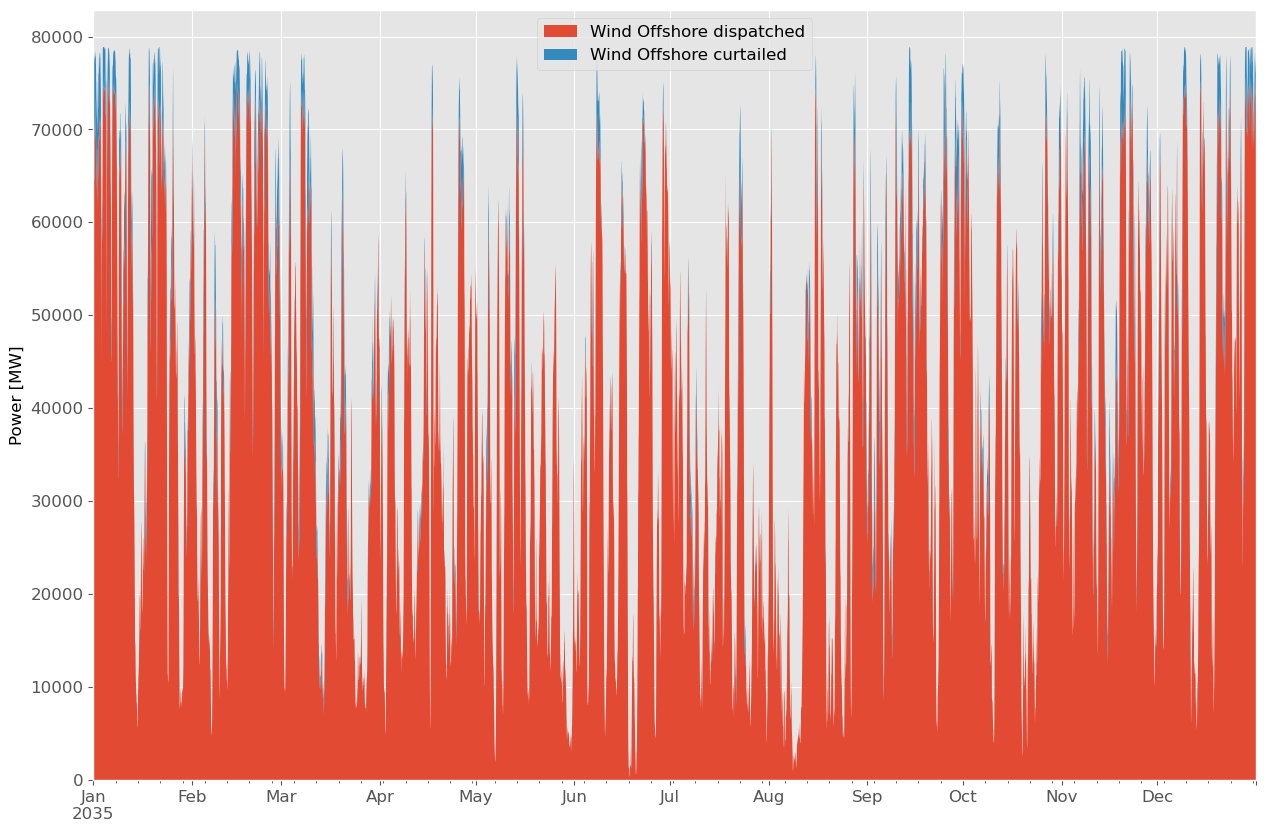

In [43]:
carrier = "Wind Offshore"

capacity = network.generators.groupby("carrier").sum().at[carrier, "p_nom"]
p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])
p_available_by_carrier = p_available.groupby(network.generators.carrier, axis=1).sum()
p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier
p_df = pd.DataFrame({carrier + " available": p_available_by_carrier[carrier],
                     carrier + " dispatched": p_by_carrier[carrier],
                     carrier + " curtailed": p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity
p_df["Wind Offshore curtailed"][p_df["Wind Offshore curtailed"] < 0.] = 0.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
p_df[[carrier + " dispatched", carrier + " curtailed"]].plot(kind="area", ax=ax, linewidth=0)
# p_df[[carrier + " available", carrier + " capacity"]].plot(ax=ax, linewidth=0)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.legend()

In [45]:
network.export_to_csv_folder('LOPF_data_heat_2035/exports')

INFO:pypsa.io:Exported network exports has storage_units, generators, lines, links, buses, loads


In [46]:
network.statistics.capex() + network.statistics.opex(aggregate_time="sum")

             carrier                        
Generator    Biomass (co-firing)                4.234295e+07
             Biomass (dedicated)                7.769220e+08
             CCS Biomass                        2.206815e+08
             CCS Gas                            4.030543e+08
             Coal                               0.000000e+00
             Hydrogen                           1.861180e+09
             Large Hydro                       -2.606748e+06
             Natural Gas                        1.105322e+09
             Nuclear                            2.286856e+08
             Oil                                1.798279e+06
             Small Hydro                       -2.558539e+05
             Solar Photovoltaics               -7.149404e+07
             Tidal lagoon                      -3.443845e+05
             Tidal stream                      -3.821027e+05
             Unmet Load                         4.270473e+14
             Waste                      

In [47]:
network.statistics.capex() 

             carrier                        
StorageUnit  Battery                            0.000000e+00
             Compressed Air                     0.000000e+00
             Liquid Air                         0.000000e+00
             P2G                                0.000000e+00
             Pumped Storage Hydroelectric       0.000000e+00
             Seasonal Thermal Energy Storage    7.135277e+07
Generator    Biomass (co-firing)                0.000000e+00
             Biomass (dedicated)                0.000000e+00
             CCS Biomass                        0.000000e+00
             CCS Gas                            0.000000e+00
             Coal                               0.000000e+00
             Hydrogen                           0.000000e+00
             Large Hydro                        0.000000e+00
             Natural Gas                        0.000000e+00
             Nuclear                            0.000000e+00
             Oil                        